In [37]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#reading the data
df=pd.read_excel('/content/Airlines+Data.xlsx')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [40]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [41]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [42]:
df.shape

(96, 2)

In [43]:
#converting the month column to date format
df['Month']=pd.to_datetime(df['Month'])

In [44]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [45]:
#i want to change the column name Month To Date
df.rename(columns={'Month':"Date"},inplace=True)

In [46]:
df.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [47]:
#extracting the year and month as Number and ,Quarter and Month as name
#Extracting year as NUMBER
df['Year']=df['Date'].dt.year

#Extracting Month As Number
df['Month_of_year']=df['Date'].dt.month

#Extracting Quarter
df['Quarter']=df['Date'].dt.quarter

#extracting Month As name
df['Month']=df['Date'].dt.strftime("%b")

In [48]:
df.head()

,Date,Passengers,Year,Month_of_year,Quarter,Month
0,1995-01-01,112,1995,1,1,Jan
1,1995-02-01,118,1995,2,1,Feb
2,1995-03-01,132,1995,3,1,Mar
3,1995-04-01,129,1995,4,2,Apr
4,1995-05-01,121,1995,5,2,May


In [49]:
#calculating sequential number Month
df['Sequential_month']=(df['Year']-df['Year'].min())*12+df['Month_of_year']
df.head()

,Date,Passengers,Year,Month_of_year,Quarter,Month,Sequential_month
0,1995-01-01,112,1995,1,1,Jan,1
1,1995-02-01,118,1995,2,1,Feb,2
2,1995-03-01,132,1995,3,1,Mar,3
3,1995-04-01,129,1995,4,2,Apr,4
4,1995-05-01,121,1995,5,2,May,5


In [50]:
df.tail()

,Date,Passengers,Year,Month_of_year,Quarter,Month,Sequential_month
91,2002-08-01,405,2002,8,3,Aug,92
92,2002-09-01,355,2002,9,3,Sep,93
93,2002-10-01,306,2002,10,4,Oct,94
94,2002-11-01,271,2002,11,4,Nov,95
95,2002-12-01,306,2002,12,4,Dec,96


In [51]:
#create dummies column for Month data
dummies_data=pd.get_dummies(df['Month_of_year'],prefix='Month')

#creating a list of Months
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#renaming the dummie column names
month_names_dict={f'Month_{i}':month_names[i - 1] for i in range(1,13)}

dummies_data=dummies_data.rename(columns=month_names_dict)

df=pd.concat([df,dummies_data],axis=1)

In [52]:
df.head()

,Date,Passengers,Year,Month_of_year,Quarter,Month,Sequential_month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995,1,1,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,2,1,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,3,1,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,4,2,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,5,2,May,5,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
df.drop('Month_of_year',inplace=True,axis=1)
df.head()

,Date,Passengers,Year,Quarter,Month,Sequential_month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995,1,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,1,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,1,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,2,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,2,May,5,0,0,0,0,1,0,0,0,0,0,0,0


<Axes: xlabel='Sequential_month', ylabel='Passengers'>

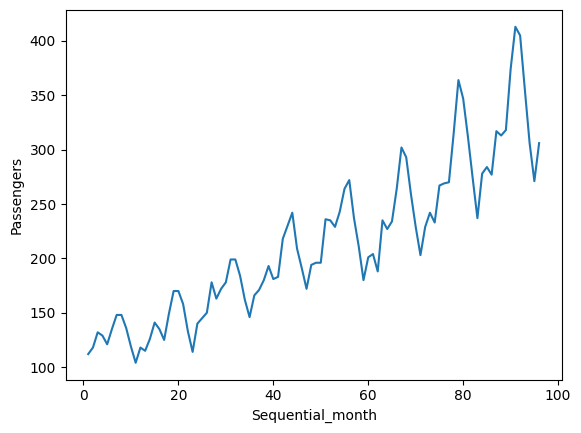

In [55]:
sns.lineplot(x=df['Sequential_month'],y=df['Passengers'])

Airlines_Passengers_data shows (over the period)


*   upward trend
*   multiplicative seasonality

In [58]:
pivot=pd.pivot_table(data=df,index="Year",columns="Month",values="Passengers",fill_value=0)
pivot

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='Month', ylabel='Year'>

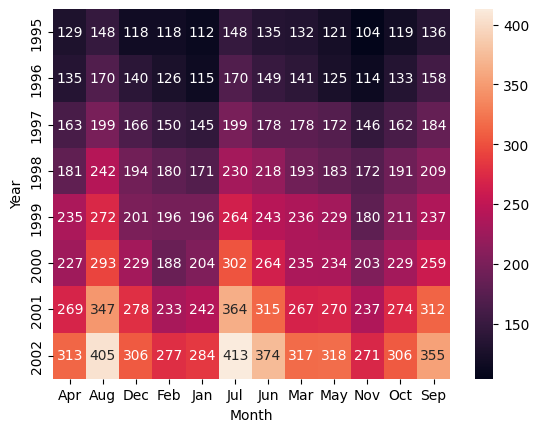

In [59]:
sns.heatmap(pivot,annot=True,fmt='g')

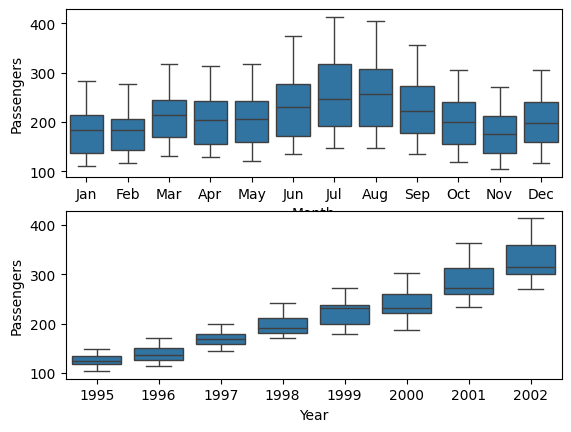

In [60]:
#boxplot
plt.subplot(211)
sns.boxplot(x=df['Month'],y=df['Passengers'])
plt.subplot(212)
sns.boxplot(x=df['Year'],y=df['Passengers'])
plt.show()

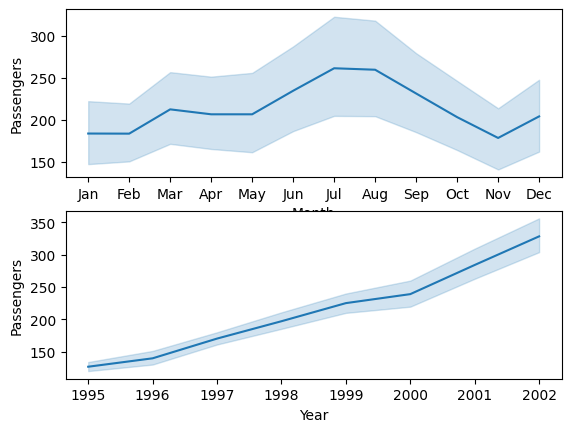

In [61]:
#lineplot
plt.subplot(211)
sns.lineplot(x=df['Month'],y=df['Passengers'])
plt.subplot(212)
sns.lineplot(x=df['Year'],y=df['Passengers'])
plt.show()

in the month of July there is surge in Passengers, it may be due to tourist arival from other countries (esp of equitorial regions) where summer is at peak at this time, they may be coming for holidays

# Splitting data

In [62]:
df.shape

(96, 18)

Am splitting the data in the ratio **75:25**

In [63]:
n1=int(0.75*df.shape[0])
n2=int(0.25*df.shape[0])

Train=df.head(n1)
Test=df.head(n2)

In [64]:
Train.shape

(72, 18)

In [65]:
Test.shape

(24, 18)

In [66]:
Train.head()

,Date,Passengers,Year,Quarter,Month,Sequential_month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995,1,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,1,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,1,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,2,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,2,May,5,0,0,0,0,1,0,0,0,0,0,0,0


In [77]:
Train.columns

Index(['Date', 'Passengers', 'Year', 'Quarter', 'Month', 'Sequential_month',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

In [71]:
#linear Model
import statsmodels.formula.api as smf
linear_model=smf.ols("Passengers~Sequential_month",data=Train).fit()

linear_model_pred=linear_model.predict(Test['Sequential_month'])

rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(linear_model_pred))**2))

rmse_linear

17.430512731005297

Improving Accuracy by applying transformations

In [72]:
#exponential
expo_model=smf.ols("np.log(Passengers)~Sequential_month",data=Train).fit()

expo_pred=expo_model.predict(Test['Sequential_month'])

expo_predx=np.exp(expo_pred)

rmse_expo=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(expo_predx))**2))
rmse_expo

16.477222826202564

In [75]:
#quadratic Transformation
quard_model=smf.ols("Passengers~Sequential_month**2+Sequential_month",data=Train).fit()

input=pd.DataFrame(Test['Sequential_month'])
input['Sequential_month_sqr']=Test['Sequential_month']**2

quard_pred=quard_model.predict(input)

rmse_quard=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(quard_pred))**2))
rmse_quard

17.430512731005297

In [79]:
#additive seasonality
addit_seas=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()

addit_pred=addit_seas.predict(Test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']])

rmse_addit=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(addit_pred))**2))
rmse_addit

50.73604077313611

In [81]:
#additive seasonality quadratic
addit_seas_qua=smf.ols("Passengers~Sequential_month+np.square(Sequential_month)+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()

input=pd.DataFrame(Test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec','Sequential_month']])
input['Sequential_month_sqr']=Test['Sequential_month']**2

addit_seas_qua_pred=addit_seas_qua.predict(input)

rmse_addit_seas_qua=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(addit_seas_qua_pred))**2))
rmse_addit_seas_qua

9.41553986093367

In [82]:
#Multiplicative seasonality
mul_seas=smf.ols("np.log(Passengers)~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()

mul_seas_pred=mul_seas.predict(Test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']])

mul_seas=np.exp(mul_seas_pred)

rmse_mul_seas=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(mul_seas))**2))
rmse_mul_seas

45.78526360120416

In [83]:
#Multiplicative Additive seasonality
mul_addit_seas=smf.ols("np.log(Passengers)~Sequential_month+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()

input=Test[['Sequential_month','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']]

mul_addit_seas_pred=mul_addit_seas.predict(input)

mul_addit_seas_pred=np.exp(mul_addit_seas_pred)

rmse_mul_addit_seas=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(mul_addit_seas_pred))**2))
rmse_mul_addit_seas

5.588173443437051

Comparing Results

In [85]:
data={'Model':["linear_model","expo_model","quard_model","addit_seas","addit_seas_qua","mul_sea","mul_addit_sea"],"RMSE_values":[rmse_linear,rmse_expo,rmse_quard,rmse_addit,rmse_addit_seas_qua,rmse_mul_seas,rmse_mul_addit_seas]}
RMSE_Table=pd.DataFrame(data)
RMSE_Table

,Model,RMSE_values
0,linear_model,17.430513
1,expo_model,16.477223
2,quard_model,17.430513
3,addit_seas,50.736041
4,addit_seas_qua,9.415540
5,mul_sea,45.785264
6,mul_addit_sea,5.588173


Out of all model built, Multiplicative additive seasonality model is best model

### **Re-building of model based on Additive Seasonality Quadratic model**

<Axes: >

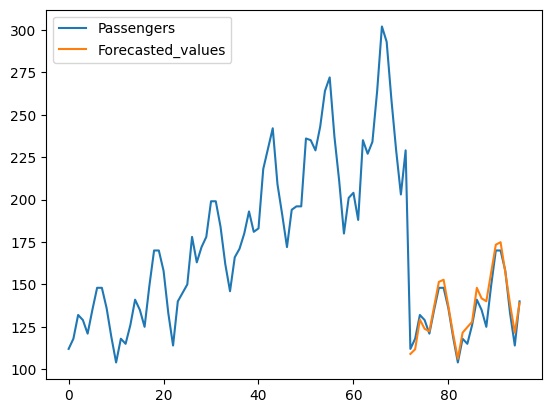

In [88]:
#Multiplicative Additive seasonality
mul_addit_seas=smf.ols("np.log(Passengers)~Sequential_month+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()

input=Test[['Sequential_month','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']]

mul_addit_seas_pred=mul_addit_seas.predict(input)

mul_addit_seas_pred=np.exp(mul_addit_seas_pred)

predicted_data=pd.DataFrame(Test)
predicted_data['Forecasted_values']=mul_addit_seas_pred

new_var = pd.concat([Train, predicted_data])

new_var[['Passengers','Forecasted_values']].reset_index(drop=True).plot()

In [89]:
df.head()

,Date,Passengers,Year,Quarter,Month,Sequential_month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995,1,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,1,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,1,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,2,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,2,May,5,0,0,0,0,1,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


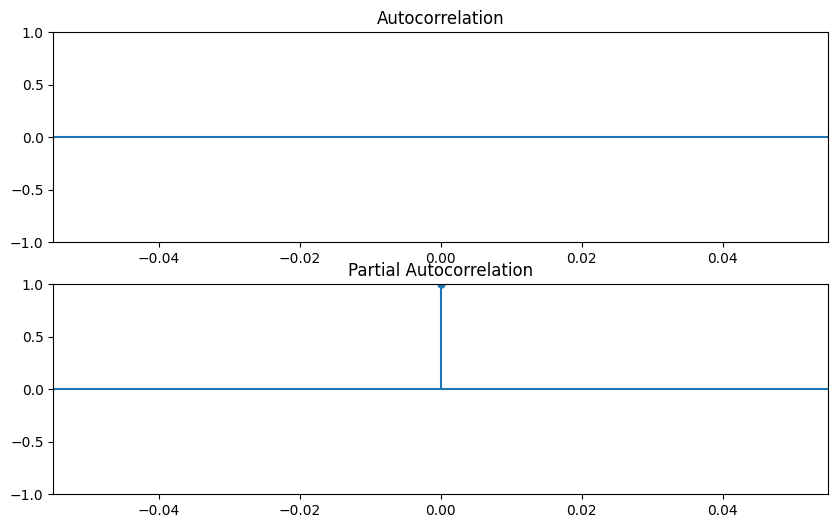

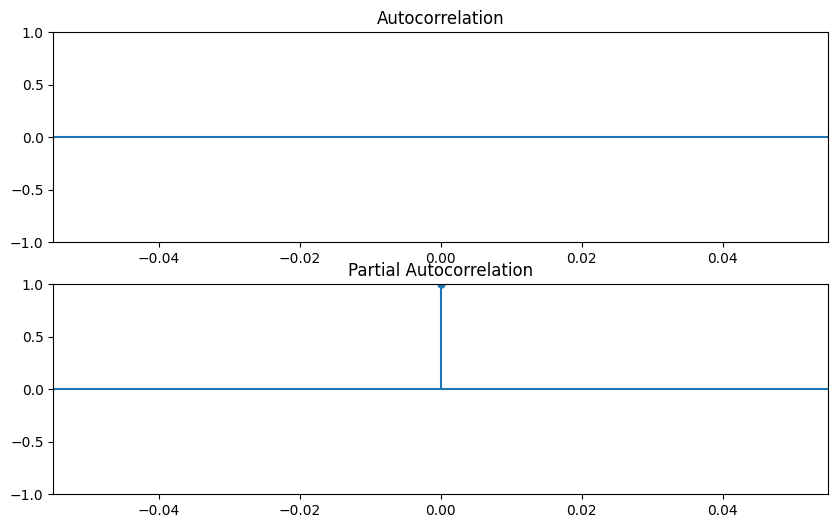

In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Create a DataFrame
df = pd.DataFrame(df)

# Step 1: Apply seasonal differencing and log transformation
# Seasonal differencing
seasonal_order = 12  # For yearly seasonality
df['Passengers_seasonal_diff'] = df['Passengers'] - df['Passengers'].shift(seasonal_order)
df['Passengers_seasonal_diff'].dropna(inplace=True)

# Log transformation
df['Passengers_log'] = np.log(df['Passengers_seasonal_diff'])

# Step 2: Plot ACF and PACF plots to select p, d, and q
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df['Passengers_log'], lags=40, ax=ax[0])
plot_pacf(df['Passengers_log'], lags=40, ax=ax[1])


# You should analyze the ACF and PACF plots to determine values of p, d, and q.
# Look for significant lags in ACF and PACF plots.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: >

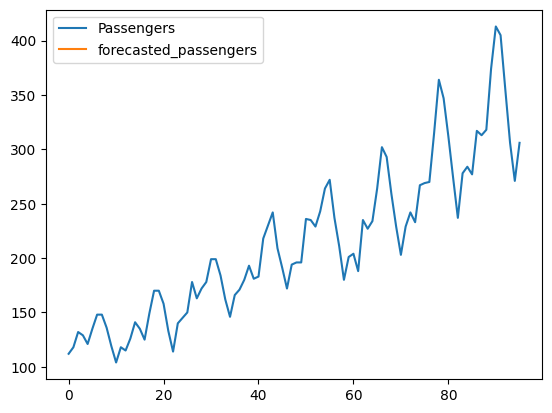

In [91]:
# Based on the plots, you can make an initial estimation of p and q values.

# Step 3: Fit the ARIMA model with selected p, d, and q
p = 1  # Initial estimate from PACF plot
d = 1  # We applied seasonal differencing
q = 1  # Initial estimate from ACF plot

model = sm.tsa.arima.ARIMA(df['Passengers_log'], order=(p, d, q))
results = model.fit()

# Step 4: Forecasting
forecasted_values = results.forecast(steps=len(df['Passengers_log']))  # Adjust the steps as needed

# Inverse the log transformation and differencing to get forecasts for the original series
df['forecasted_passengers_log'] = forecasted_values
df['forecasted_passengers_diff'] = np.exp(df['forecasted_passengers_log'])
df['forecasted_passengers'] = df['forecasted_passengers_diff'] + df['Passengers'].shift(seasonal_order)
df['forecasted_passengers'].dropna(inplace=True)

# Plot the actual and forecasted values
df[['Passengers', 'forecasted_passengers']].plot()



/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


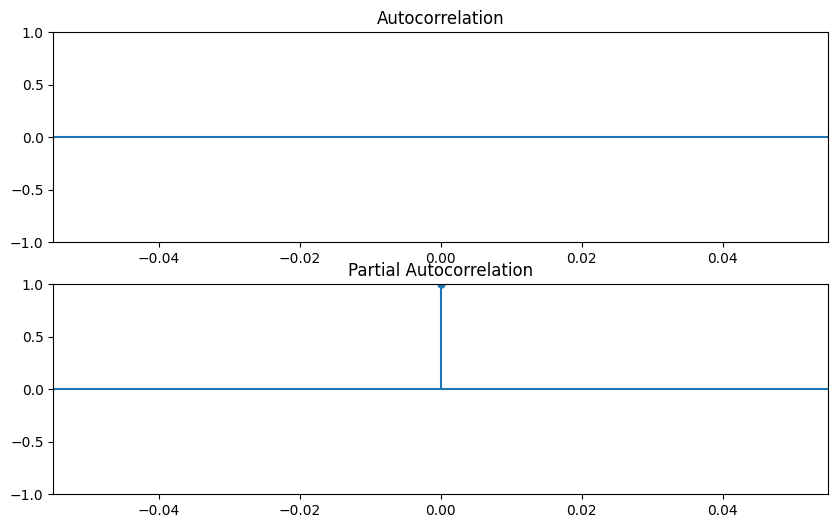

In [93]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a DataFrame
df2 = pd.DataFrame(df)

# Step 1: Apply seasonal differencing
# Yearly Seasonal differencing (assuming monthly data)
seasonal_order = 12  # For yearly seasonality
df2['Passengers_yearly_diff'] = df2['Passengers'] - df2['Passengers'].shift(seasonal_order)
df2['Passengers_yearly_diff'].dropna(inplace=True)

# Step 2: Plot ACF and PACF plots to select p, d, and q
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df2['Passengers_yearly_diff'], lags=40, ax=ax[0])
plot_pacf(df2['Passengers_yearly_diff'], lags=40, ax=ax[1])
plt.show()

# You should analyze the ACF and PACF plots to determine values of p, d, and q.
# Look for significant lags in ACF and PACF plots.

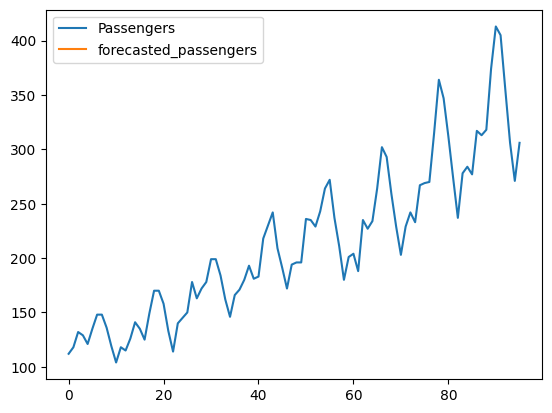

In [94]:
# Based on the plots, you can make an initial estimation of p and q values.

# Step 3: Fit the ARIMA model with selected p, d, and q
p = 0  # Initial estimate from PACF plot
d = 1  # We applied yearly seasonal differencing
q = 0  # Initial estimate from ACF plot

model = sm.tsa.arima.ARIMA(df2['Passengers_yearly_diff'], order=(p, d, q))
results = model.fit()

# Step 4: Forecasting
forecasted_values = results.forecast(steps=len(df2['Passengers_yearly_diff']))  # Adjust the steps as needed

# Inverse the seasonal differencing to get forecasts for the original series
df2['forecasted_passengers'] = forecasted_values + df2['Passengers'].shift(seasonal_order)
df2['forecasted_passengers'].dropna(inplace=True)

# Plot the actual and forecasted values
df2[['Passengers', 'forecasted_passengers']].plot()
plt.show()


## Observations
Dummy Variables


*   following are the Dummy Variables were made for our model building and visualisations
*  ['Year', 'Quarter', 'Month', 'Sequential_Months', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
* Quarter Column were made for quarterly obseravtions
* Month column for monthly observations
* Year column for yearly observations
* 'Sequential_Months' column was made for getting squence of months in order to get continuity in monthly data points
* 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' dummy columns were made for getting Sales visualisations over the YoY data points

**data Obeservations**


*   heatmap shows Aug, Jul, Jun, Sep months are fetching higher Passengers footsteps
*   Airlines_Passengers data shows (over the period) upward trend & multiplicative seasonality
* in the month of July there is surge in Passengers, it may be due to tourist arival from other countries (esp of equitorial regions) where summer is at peak at this time, they may be coming for holidays

## **Best Model**



*   Out of all model built, Multiplicative additive seasonality model is best model
*   model is predicting slightly below passengers turn out, which shows that an airport will be working very efficiently in current scenario but not at later stage as footprints shoots up with the time. This shows that we may opt for other machine learning or deep learning model. RNN (Recurrent Neural Network) will be better choice for us to meet the future demands.








